[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aprendizaje-automatico-dc-uba-ar/material/blob/main/notebooks/notebook_06_metricas-published.ipynb)

# Evaluación

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display


## Matrices de confusión

Recordemos que una matriz de confusión nos permite observar el resultado de nuestra clasificación. Para armarla:
- cada fila los valores observados o reales
- cada columna los valores predichos

Y en cada celda:
- $m_{i,i}$ las instancias bien clasificadas
- $m_{i,j}\ (con\ i\neq j)$ las instancias mal clasificadas (era de instancia $i$ pero el clasificador dijo $j$)

Implementar la siguiente función para poder construir una matriz de confusión binaria. Deberá tomar la etiqueta que es considerada "éxito" como parámetro.

In [3]:
from typing import Tuple, Any

def confusion_matrix(y_real: list, y_predicted: list, positive_label: Any, show: bool =False) -> Tuple[int, int, int, int]:
    # Construye una matriz de confusión (binaria)
    # y_actual es la secuencia de etiquetas reales
    # y_predicted es la secuencia de etiquetas predichas por el clasificador
    # positive_label indica cuál es la etiqueta considerada positiva.

    tp = sum([y_i == positive_label and y_j == positive_label for (y_i, y_j) in zip(y_predicted, y_real)])  # verdaderos positivos
    tn = sum([y_i != positive_label  and y_j != positive_label for (y_i, y_j) in zip(y_predicted, y_real)])  # verdaderos negativos
    fp = sum([y_i == positive_label and y_j != positive_label for (y_i, y_j) in zip(y_predicted, y_real)])  # falsos positivos
    fn = sum([y_i != positive_label and y_j == positive_label for (y_i, y_j) in zip(y_predicted, y_real)])  # falsos negativos
    
    if show:
        display(pd.DataFrame([[tp, fn], [fp, tn]], index=["real +", "real -"], columns=["pred +", "pred -"]))
        
        
    return tp, tn, fp, fn


### Test 1

Vamos a probar ahora la función. Sabiendo que se recibieron 990 emails. Y que se recibieron, en este orden:
  - 10 correos no deseados
  - 978 correos 
  - 2 correos no deseados
  
El filtro anti-spam estableció las siguientes clasificaciones (también en órden):
  - 2 correos no deseados
  - 900 correos
  - 20 correos no deseados
  - 68 correos
  
Construir dos listas de strings que contengan `"spam"` o `"no-spam"` y que representen la etiqueta real (`y_real`) y la etiqueta predicha por el filtro anti-spam (`y_pred`).

In [11]:
y_real = ["spam"] * 10  + ["no-spam"] * 978 + ["spam"] * 2
y_pred = ["spam"] * 2 + ["no-spam"] * 900 + ["spam"] * 20 + ["no spam"] * 68

Correr la matriz de confusión y verificar que el resultado es el esperado.

In [12]:
tp, tn, fp, fn = confusion_matrix(y_real=y_real, y_predicted=y_pred, positive_label="spam", show=False)
# Si se cambia show a True se puede visualizar la matriz de confusión

print("Test 1")
print("(tp, tn, fp, fn) = ", (tp, tn, fp, fn))
assert((tp, tn, fp, fn) == (2, 958, 20, 10))
print("OK")

Test 1
(tp, tn, fp, fn) =  (2, 958, 20, 10)
OK


## Métricas

En esta sección trabajeremos con las métricas estándares de clasificación.

### Test 2
A continuacion completar las funciones que computan las distintas métricas

In [15]:
def accuracy_score(tp: int, tn: int, fp: int, fn: int) -> float:
    return (tp + tn) / (tp + tn + fp + fn)


def precision_score(tp: int, tn: int, fp: int, fn: int) -> float:
    return tp / (tp + fp)


def recall_score(tp: int, tn: int, fp: int, fn: int) -> float:
    return tp/(tp+fn)


def f_beta_score(tp: int, tn: int, fp: int, fn: int, beta: float) -> float:
    prec = precision_score(tp, tn, fp, fn)
    recl = recall_score(tp, tn, fp, fn)
    f_beta_score = (1 + beta**2) * (prec * recl) / ((beta**2) * prec + recl)
    return f_beta_score


def f1_score(tp: int, tn: int, fp: int, fn: int) -> float:
    return f_beta_score(tp, tn, fp, fn, beta=1)


def all_metrics(tp: int, tn: int, fp: int, fn: int) -> float:
    accuracy = round(accuracy_score(tp, tn, fp, fn), 3)
    precision = round(precision_score(tp, tn, fp, fn), 3)
    recall = round(recall_score(tp, tn, fp, fn), 3)
    f1 = round(f1_score(tp, tn, fp, fn), 3)
    return accuracy, precision, recall, f1


Evaluar las funciones con el siguiente caso de test.

In [16]:
tp, tn, fp, fn = confusion_matrix(y_real=y_real, y_predicted=y_pred, positive_label="spam")
(accuracy, precision, recall, f1) = all_metrics(tp, tn, fp, fn)

print("Test 2")
print("(accuracy, precision, recall, f1) = ", (accuracy, precision, recall, f1))
assert((accuracy, precision, recall, f1) == (0.97, 0.091, 0.167, 0.118))
print("OK")

Test 2
(accuracy, precision, recall, f1) =  (0.97, 0.091, 0.167, 0.118)
OK


## Comparando predicciones

Sean los siguientes datos provenientes de 2 clasificadores (A y B) y el valor real de las etiquetas.

In [19]:
# Etiquetas reales
y_real = ["perro"] * 18 + ["gato"] * 980 + ["perro"] * 5

# Etiquetas devueltas por "clasificador A"
y_pred_A = ["gato"] * 980 + ["perro"] * 20 + ["gato"] * 3

# Etiquetas devueltas por "clasificador B"
y_pred_B = ["perro"] * 40 + ["gato"] * 900 + ["perro"] * 60 + ["gato"] * 3

df = pd.DataFrame(data={"y_real": y_real,
                           "y_pred_A": y_pred_A,
                           "y_pred_B": y_pred_B,                           
                          })

res = []
print("Clasificador A, etiqueta de éxito: gato")
tp, tn, fp, fn = confusion_matrix(y_real=y_real, y_predicted=y_pred_A, positive_label="gato", show=True)
res.append(all_metrics(tp, tn, fp, fn))

print("Clasificador B, etiqueta de éxito: gato")
tp, tn, fp, fn = confusion_matrix(y_real=y_real, y_predicted=y_pred_B, positive_label="gato", show=True)
res.append(all_metrics(tp, tn, fp, fn))

print("Clasificador A, etiqueta de éxito: perro")
tp, tn, fp, fn = confusion_matrix(y_real=y_real, y_predicted=y_pred_A, positive_label="perro", show=True)
res.append(all_metrics(tp, tn, fp, fn))

print("Clasificador B, etiqueta de éxito: perro")
tp, tn, fp, fn = confusion_matrix(y_real=y_real, y_predicted=y_pred_B, positive_label="perro", show=True)
res.append(all_metrics(tp, tn, fp, fn))

pd.DataFrame(res, columns=["accuracy", "precision", "recall", "f1"], index=["CLF A (gato)", "CLF B (gato)", "CLF A (perro)", "CLF B (perro)"])

Clasificador A, etiqueta de éxito: gato


,pred +,pred -
real +,962,18
real -,21,2


Clasificador B, etiqueta de éxito: gato


,pred +,pred -
real +,900,80
real -,3,20


Clasificador A, etiqueta de éxito: perro


,pred +,pred -
real +,2,21
real -,18,962


Clasificador B, etiqueta de éxito: perro


,pred +,pred -
real +,20,3
real -,80,900


,accuracy,precision,recall,f1
CLF A (gato),0.961,0.979,0.982,0.980
CLF B (gato),0.917,0.997,0.918,0.956
CLF A (perro),0.961,0.100,0.087,0.093
CLF B (gato),0.917,0.200,0.870,0.325


¿Qué podemos concluir con este experimento?


Vemos que los accuracies dan iguales sin importar que el valor positivo sea "perro" o "gato". Además, podemos ver que para precision, recall y f1 cambia bastante el resultado dependiendo de que marcamos como positivo. 

Vemos que para el clasificador A, cuando marcamos positivo = "gato" tanto la precision, el recall y f1 nos dieron mucho más altos que cuando marcamos positivo = "perro". Sin embargo, para el clasificador B vemos que el recall no cambia tanto como los otros dos cuando pasamos de "gato" a "perro" como valor positivo.

Por otro lado, el accuracy no cambia para ninguno de los dos clasificadores.

Para concluir, si me importa que el modelo prediga de forma correcta los gatos, me quedaría con los clasificadores que toman como instancia positiva a "gato". Sin embargo, vemos que en los clasificadores cuando positivo = "perro" los TP dan muy pequeños, es decir, son pocos los que califica como perros y lo son verdaderamente.

## Analizando $F_1$

A continuación realizamos un experimento variando levemente las condiciones en cada pasada.

El código que realiza el experimento es el siguiente:

In [23]:
y_real = ["perro"] * 100 + ["gato"] * 900 + ["perro"] * 80
y_pred = ["perro"] * 80 + ["gato"] * 800 + ["perro"] * 200

tns_gato = []
f1s_gato = []
f1s_perro = []
f1s_avg = []


for i in range(0, 10000, 100):
    y_real_2 = y_real + ["perro"] * i #al final de la lista les agrega cierta cantidad de perros 
    y_pred_2 = y_pred + ["perro"] * i #al final de la lista les agrega cierta cantidad de perros 
    #estan bien predichos porque en ambos son iguales

    tp1, tn1, fp1, fn1 = confusion_matrix(y_real=y_real_2, y_predicted=y_pred_2, positive_label="gato")
    tp2, tn2, fp2, fn2 = confusion_matrix(y_real=y_real_2, y_predicted=y_pred_2, positive_label="perro")

    f1_gato = f1_score(tp1, tn1, fp1, fn1)
    f1_perro = f1_score(tp2, tn2, fp2, fn2)
    f1_avg = (f1_gato + f1_perro) / 2 #promedio de ambos f1_score

    tns_gato.append(tn1)
    f1s_gato.append(f1_gato)
    f1s_perro.append(f1_perro)
    f1s_avg.append(f1_avg)

1. ¿Qué realiza este experimento?
1. ¿Qué relación existe entre la $F_1$ de perro y de gato a medida que se aumenta la cantidad de perros que tiene la muestra?
1. ¿En algún punto valen lo mismo?¿En cuál?¿Por qué?

In [24]:
print(f1s_gato)
print(f1s_perro)

[0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294, 0.9176470588235294,

1. Calcula los f1 scores cuando positivo = "gato" y cuando positivo = "perro" y luego hace el promedio de ambos para distintos datos que tienen cada vez más valores de "perro" bien clasificados(TP cuando pos = "perro" y TN cuando pos = "gato").
2. Vemos que el f1_gato se mantiene igual cuando se agregan los perros porque cuando gato = "positivo" no me cambia que los perros estén bien clasificados, ya que no me afecta ni el precision ni el recall y entonces no me afecta el f1_gato (no hay TN). En cambio, si positivo = "perro", el f1_perro va creciendo cada vez más ya que aumenta la cantidad de TP (y FP y TN se mantienen porque solo agregamos perros bien clasificados).
3. Llegan a tener valores muy similares, 0.9176 vs. 0.9156. Esto se debe a que uno se mantiene y el otro aumenta habiendo comenzado en un valor menor, entonces en un momento tienen un valor muy similar.

A continuación se propone graficar cómo varía la métrica $F_1$ al aumentar la cantidad de True Negatives (observar
que estamos cambiando la cantidad de instancias sobre las que testeamos). 

1. ¿Qué curva modifica más el agregado de las etiquetas `perro`?¿Por qué? 
1. ¿Qué se puede concluir de este experimento?
    

1. Como dijimos anteriormente, el f1 score que se ve más afectado es f1_perro (por lo dicho antes).
2. Ya lo explicamos anteriormente, pero podemos concluir que cambia que elegimos como positivo y qué como negativo. Depende qué es lo que quiero que califique como TP.

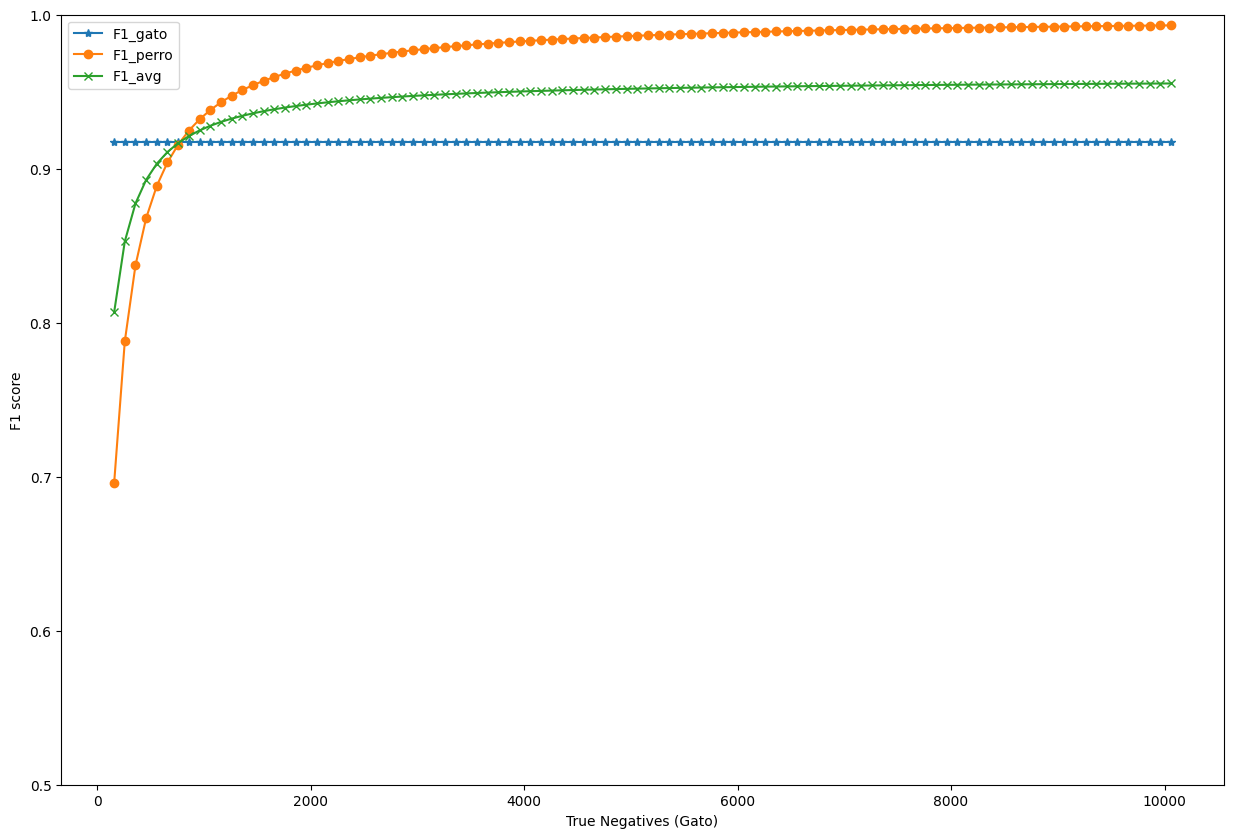

In [22]:
plt.figure(figsize=(15, 10))

plt.plot(tns_gato, f1s_gato, "*-", label="F1_gato")
plt.plot(tns_gato, f1s_perro, "o-", label="F1_perro")
plt.plot(tns_gato, f1s_avg, "x-", label="F1_avg")
plt.xlabel("True Negatives (Gato)")
plt.ylabel("F1 score")
plt.ylim([0.5,1])
plt.legend()
plt.show()
